<a href="https://colab.research.google.com/github/ElaiEmylleMatos/challenge-telecom-x/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [205]:
# Leitura da base de dados
url = 'https://raw.githubusercontent.com/ElaiEmylleMatos/challenge-telecom-x/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)

dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

### Desaninhando o json

In [206]:
customer = pd.json_normalize(dados['customer'])
phone = pd.json_normalize(dados['phone'])
internet = pd.json_normalize(dados['internet'])
account = pd.json_normalize(dados['account'])

df = dados.drop(['customer', 'phone', 'internet', 'account'], axis=1)

df = pd.concat([df, customer, phone, internet, account], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Limpar colunas desnecessárias

In [207]:
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


### Convertendo campos

In [209]:
# Gastos totais para float
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


### Nan

In [210]:
df.isna().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [211]:
df.dropna(inplace=True)

### Valores inconsistentes

In [212]:
colunas = df.columns

for coluna in colunas:
    print(f'{coluna}: {df[coluna].unique()}')


Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68

In [213]:
df['Churn'] = df['Churn'].replace('', 'No')
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

#📊 Carga e análise

### Descrição estatística

In [214]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


In [215]:
df.describe(include='object')

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5387,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445


In [216]:
proporcao_churn = df['Churn'].value_counts(normalize=True)

print(f'Cerca de {round(proporcao_churn.iloc[0]*100, 1)}% dos clientes não cancelaram o contrato.')
print(f'Cerca de {round(proporcao_churn.iloc[1]*100, 1)}% dos clientes cancelaram o contrato.')

Cerca de 74.2% dos clientes não cancelaram o contrato.
Cerca de 25.8% dos clientes cancelaram o contrato.


<Axes: xlabel='Churn', ylabel='Count'>

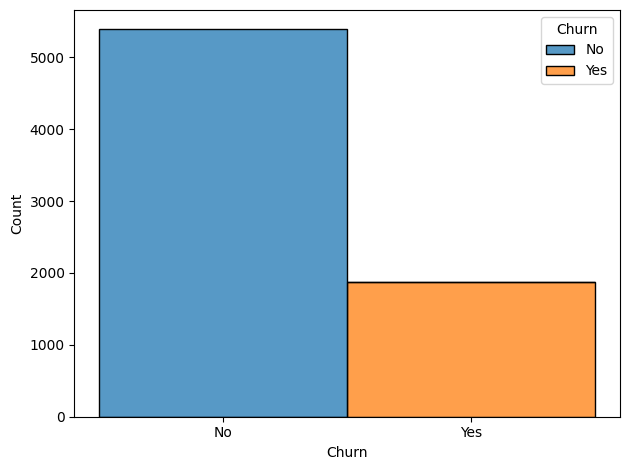

In [217]:
sns.histplot(data=df, x="Churn", hue="Churn", multiple="stack")

### Cancelamento por variáveis categóricas

#### Demográficas

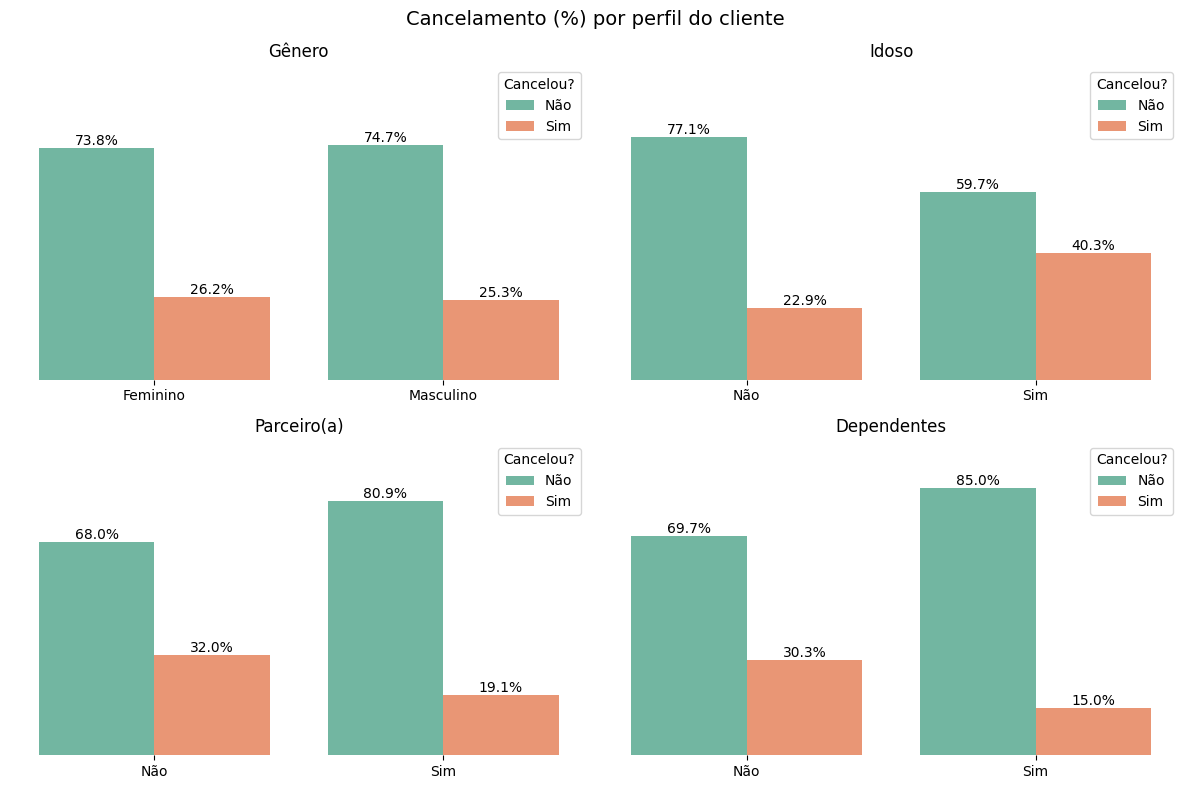

In [218]:
# Variáveis e títulos
vars_demo = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
titles = ['Gênero', 'Idoso', 'Parceiro(a)', 'Dependentes']

# Labels mais amigáveis
label_maps = {
    'gender': {'Female': 'Feminino', 'Male': 'Masculino'},
    'SeniorCitizen': {0: 'Não', 1: 'Sim'},
    'Partner': {'Yes': 'Sim', 'No': 'Não'},
    'Dependents': {'Yes': 'Sim', 'No': 'Não'}
}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Cancelamento (%) por perfil do cliente', fontsize=14)

for ax, var, title in zip(axs.flatten(), vars_demo, titles):
    # Criar tabela de proporções (% de churn dentro de cada categoria)
    prop_df = (
        df.groupby(var)['Churn']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index()
    )
    # Substituir labels por mais amigáveis
    prop_df[var] = prop_df[var].map(label_maps[var])

    # Plot com ordem fixa de churn
    sns.barplot(
        data=prop_df,
        x=var,
        y='proportion',
        hue='Churn',
        hue_order=['No','Yes'],   # garante ordem fixa
        palette='Set2',
        ax=ax
    )

    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 1)
    ax.yaxis.set_visible(False)

    # Ajustar legenda com labels amigáveis
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')

    # Tirar as caixas (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels com % em cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='{:.1%}')

plt.show()


In [219]:
cancelamento_taxas = pd.DataFrame({'Idoso':[40.3]})

### Relacionamento com a empresa

/tmp/ipython-input-2384453541.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-2384453541.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-2384453541.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


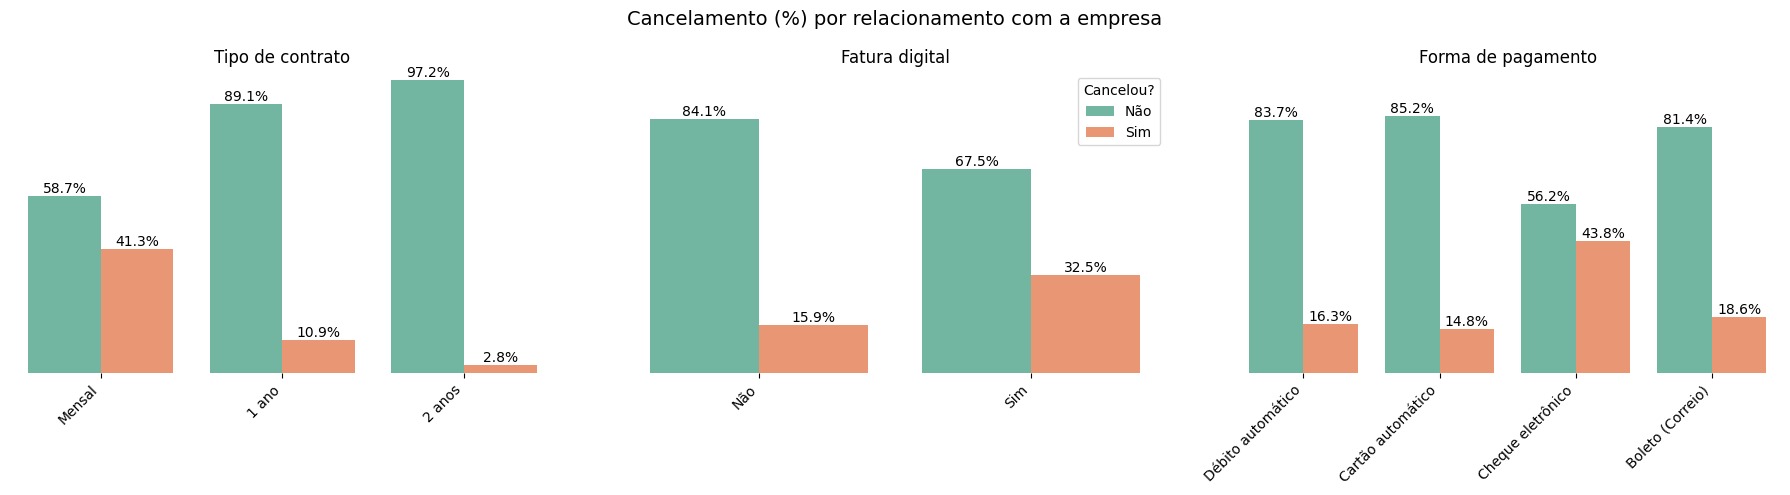

In [220]:
# Variáveis e títulos
vars_rel = ['Contract', 'PaperlessBilling', 'PaymentMethod']
titles_rel = ['Tipo de contrato', 'Fatura digital', 'Forma de pagamento']

# Labels mais amigáveis
label_maps_rel = {
    'Contract': {
        'Month-to-month': 'Mensal',
        'One year': '1 ano',
        'Two year': '2 anos'
    },
    'PaperlessBilling': {'Yes': 'Sim', 'No': 'Não'},
    'PaymentMethod': {
        'Mailed check': 'Boleto (Correio)',
        'Electronic check': 'Cheque eletrônico',
        'Credit card (automatic)': 'Cartão automático',
        'Bank transfer (automatic)': 'Débito automático'
    }
}

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.subplots_adjust(wspace=0.3)
fig.suptitle('Cancelamento (%) por relacionamento com a empresa', fontsize=14)

for ax, var, title in zip(axs.flatten(), vars_rel, titles_rel):
    # Criar tabela de proporções (% de churn dentro de cada categoria)
    prop_df = (
        df.groupby(var)['Churn']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index()
    )
    # Substituir labels por mais amigáveis
    prop_df[var] = prop_df[var].map(label_maps_rel[var])

    # Plot com ordem fixa de churn
    sns.barplot(
        data=prop_df,
        x=var,
        y='proportion',
        hue='Churn',
        hue_order=['No','Yes'],   # garante ordem fixa
        palette='Set2',
        ax=ax
    )

    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 1)
    ax.yaxis.set_visible(False)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Ajustar legenda com labels amigáveis (só na primeira coluna pra não repetir)
    if ax == axs[1]:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')
    else:
        ax.get_legend().remove()

    # Tirar as caixas (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels com % em cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='{:.1%}')

plt.show()


In [221]:
cancelamento_taxas['Contrato Mensal'] = 41.3
cancelamento_taxas['Pagamento em Cheque Eletrônico'] = 43.8

cancelamento_taxas

,Idoso,Contrato Mensal,Pagamento em Cheque Eletrônico
0,40.3,41.3,43.8


#### Serviços Contratados

/tmp/ipython-input-867244424.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-867244424.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-867244424.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-867244424.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-867244424.py:60: UserWarning: set_ticklabels() should

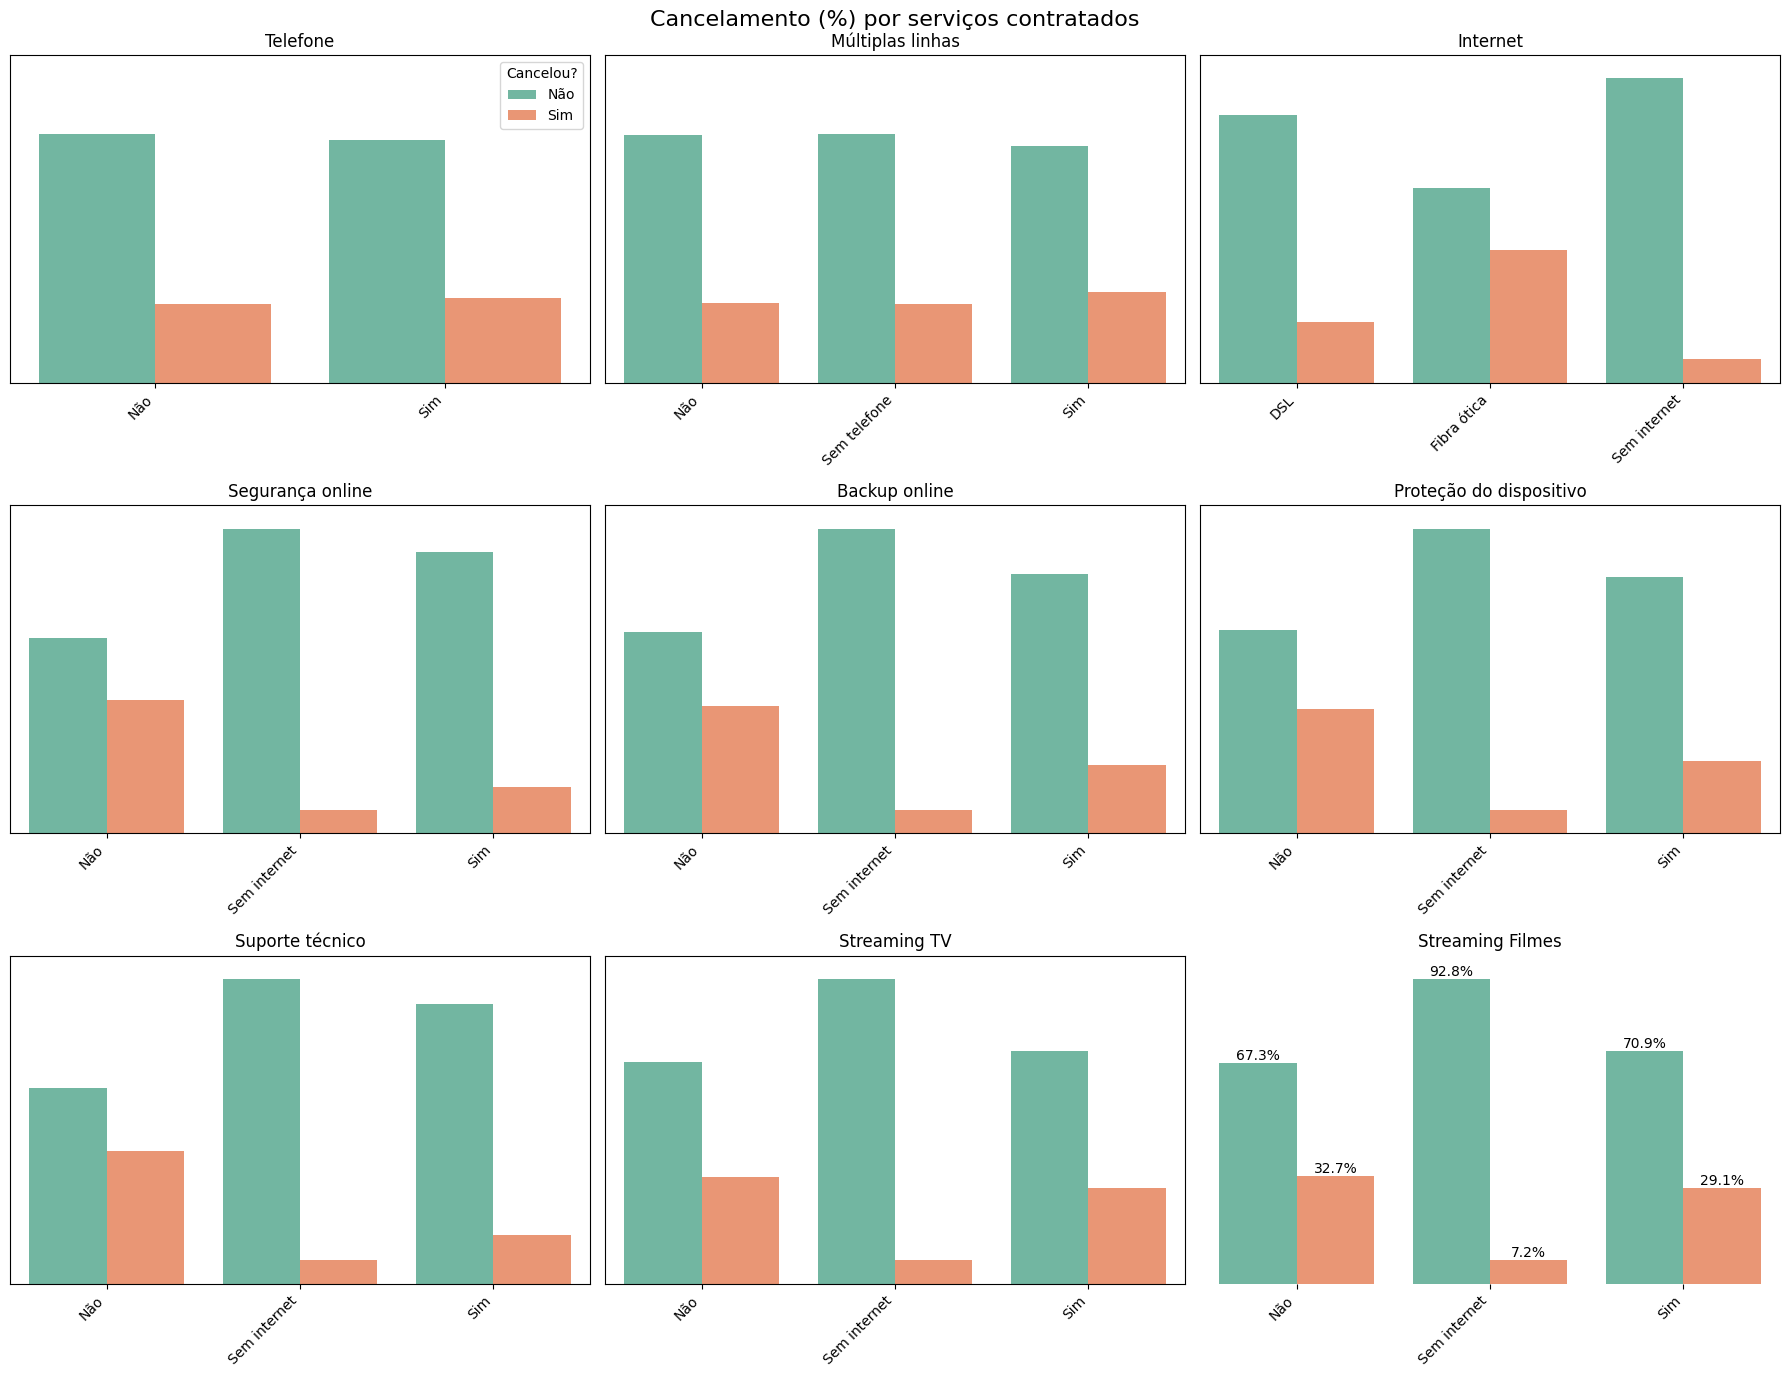

In [222]:
# Variáveis e títulos
vars_serv = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

titles_serv = [
    'Telefone', 'Múltiplas linhas', 'Internet',
    'Segurança online', 'Backup online', 'Proteção do dispositivo',
    'Suporte técnico', 'Streaming TV', 'Streaming Filmes'
]

# Labels mais amigáveis
label_maps_serv = {
    'PhoneService': {'Yes': 'Sim', 'No': 'Não'},
    'MultipleLines': {'Yes': 'Sim', 'No': 'Não', 'No phone service': 'Sem telefone'},
    'InternetService': {'DSL': 'DSL', 'Fiber optic': 'Fibra ótica', 'No': 'Sem internet'},
    'OnlineSecurity': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'OnlineBackup': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'DeviceProtection': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'TechSupport': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'StreamingTV': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'StreamingMovies': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'}
}

fig, axs = plt.subplots(3, 3, figsize=(18, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Cancelamento (%) por serviços contratados', fontsize=16)

for ax, var, title in zip(axs.flatten(), vars_serv, titles_serv):
    # Criar tabela de proporções (% de churn dentro de cada categoria)
    prop_df = (
        df.groupby(var)['Churn']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index()
    )
    # Substituir labels por mais amigáveis
    prop_df[var] = prop_df[var].map(label_maps_serv[var])

    # Plot com ordem fixa de churn
    sns.barplot(
        data=prop_df,
        x=var,
        y='proportion',
        hue='Churn',
        hue_order=['No', 'Yes'],
        palette='Set2',
        ax=ax
    )

    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 1)
    ax.yaxis.set_visible(False)

    # Rotacionar labels do eixo x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Ajustar legenda (só no primeiro gráfico)
    if ax == axs[0,0]:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')
    else:
        ax.get_legend().remove()

# Tirar as caixas (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Add labels com % em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='{:.1%}')

plt.show()


In [223]:
cancelamento_taxas['Internet Fibra Otica'] = 40.6
cancelamento_taxas['Sem Segurança Online'] = 40.5
cancelamento_taxas['Sem Suporte Técnico'] = 40.4

maiores_cancelamentos = cancelamento_taxas.T
maiores_cancelamentos.rename(columns={0: 'Taxa percentual de cancelamento %'}, inplace=True)
maiores_cancelamentos
maiores_cancelamentos.sort_values(by='Taxa percentual de cancelamento %', ascending=False)

,Taxa percentual de cancelamento %
Pagamento em Cheque Eletrônico,43.8
Contrato Mensal,41.3
Internet Fibra Otica,40.6
Sem Segurança Online,40.5
Sem Suporte Técnico,40.4
Idoso,40.3


### Cancelamento por Variáveis Numéricas

/tmp/ipython-input-1316042668.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='Set2', ax=axs[0, i])
/tmp/ipython-input-1316042668.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='Set2', ax=axs[0, i])
/tmp/ipython-input-1316042668.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='Set2', ax=axs[0, i])


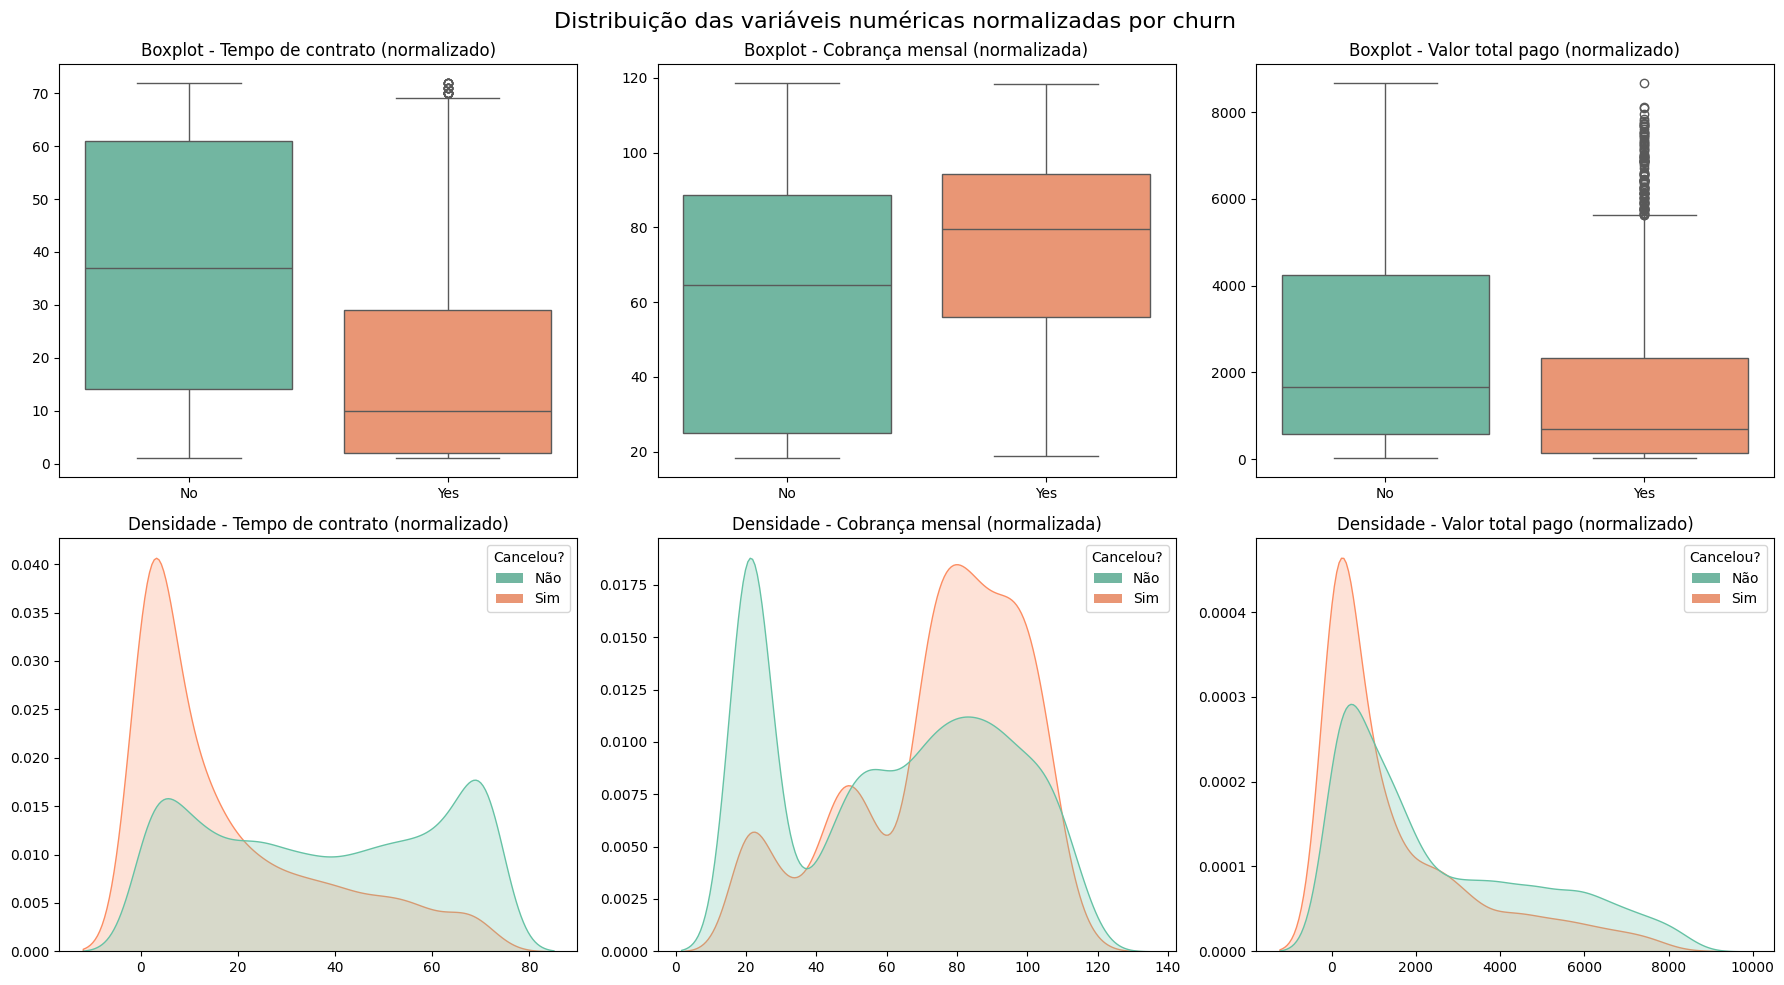

In [224]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar variáveis
scaler = MinMaxScaler()


num_vars = ['tenure', 'Charges.Monthly', 'Charges.Total']
titles_num = ['Tempo de contrato (normalizado)',
              'Cobrança mensal (normalizada)',
              'Valor total pago (normalizado)']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Distribuição das variáveis numéricas normalizadas por churn', fontsize=16)

for i, (var, title) in enumerate(zip(num_vars, titles_num)):
    # Boxplot
    sns.boxplot(x='Churn', y=var, data=df, palette='Set2', ax=axs[0, i])
    axs[0, i].set_title(f'Boxplot - {title}')
    axs[0, i].set_xlabel('')
    axs[0, i].set_ylabel('')

    # KDE
    sns.kdeplot(data=df, x=var, hue='Churn', fill=True,
                common_norm=False, palette='Set2', ax=axs[1, i])
    axs[1, i].set_title(f'Densidade - {title}')
    axs[1, i].set_xlabel('')
    axs[1, i].set_ylabel('')
    handles, labels = ax.get_legend_handles_labels()
    # axs[0, i].legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')
    axs[1, i].legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')

plt.show()


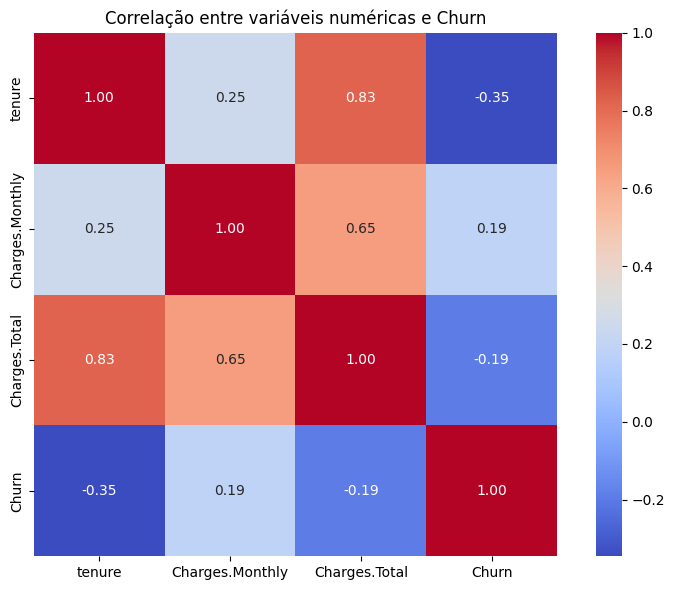

In [225]:
# Transformar churn em numérico (Yes=1, No=0) para cálculo
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes':1, 'No':0})

# Selecionar só as numéricas + churn
corr = df_corr[['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlação entre variáveis numéricas e Churn")
plt.show()

/tmp/ipython-input-2904957572.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_bin')['Churn']


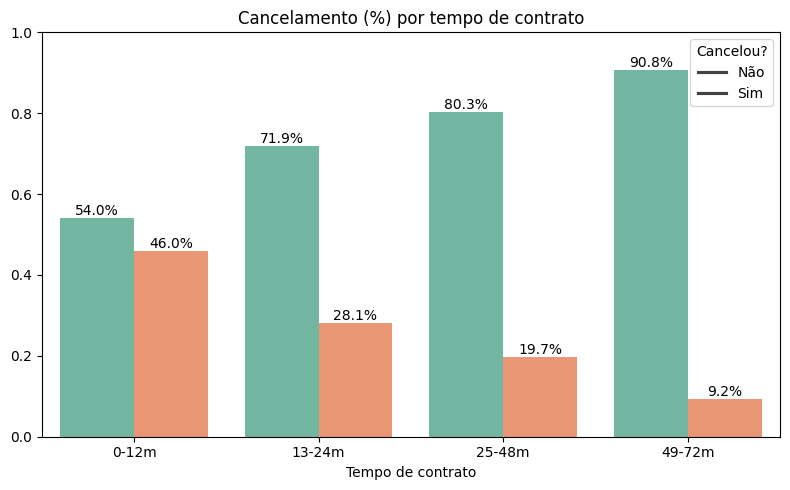

In [226]:
# Criar faixas de tenure
bins = [0, 12, 24, 48, 72]  # 1 ano, 2 anos, 4 anos, 6 anos
labels = ['0-12m', '13-24m', '25-48m', '49-72m']
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# Calcular % de churn por faixa
tenure_churn = (
    df.groupby('tenure_bin')['Churn']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=tenure_churn,
    x='tenure_bin',
    y='proportion',
    hue='Churn',
    palette='Set2'
)
plt.title("Cancelamento (%) por tempo de contrato")
plt.ylabel("")
plt.xlabel("Tempo de contrato")
plt.ylim(0,1)
plt.legend(title="Cancelou?", labels=["Não", "Sim"], loc="upper right")

# Adicionar rótulos em %
for container in plt.gca().containers:
    plt.bar_label(container, fmt="{:.1%}")

plt.show()


/tmp/ipython-input-2165139926.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Charges.Monthly_bin')['Churn']


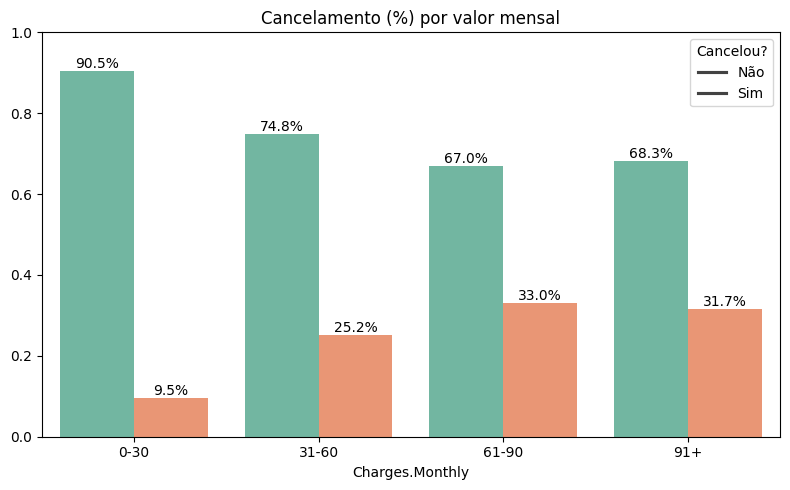

/tmp/ipython-input-2165139926.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Charges.Total_bin')['Churn']


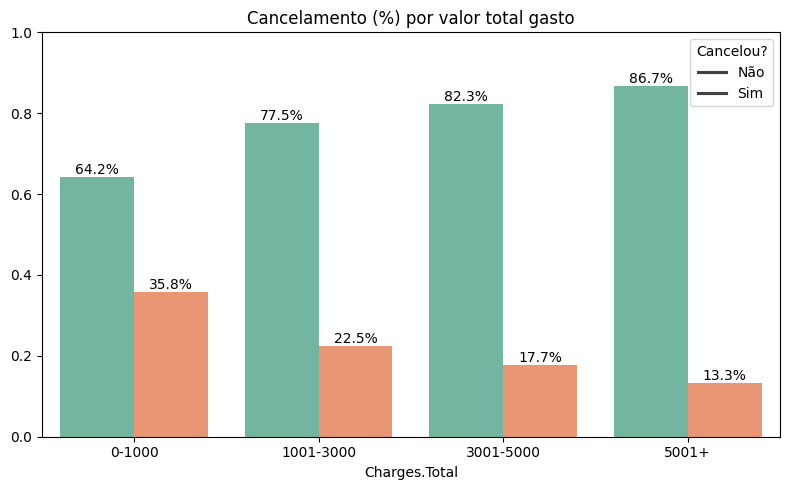

In [227]:
# Criar faixas para Charges.Monthly
bins_monthly = [0, 30, 60, 90, df['Charges.Monthly'].max()]
labels_monthly = ['0-30', '31-60', '61-90', '91+']
df['Charges.Monthly_bin'] = pd.cut(
    df['Charges.Monthly'],
    bins=bins_monthly,
    labels=labels_monthly,
    include_lowest=True
)

# Criar faixas para Charges.Total
bins_total = [0, 1000, 3000, 5000, df['Charges.Total'].max()]
labels_total = ['0-1000', '1001-3000', '3001-5000', '5001+']
df['Charges.Total_bin'] = pd.cut(
    df['Charges.Total'],
    bins=bins_total,
    labels=labels_total,
    include_lowest=True
)

# ===========================
# Charges.Monthly
monthly_churn = (
    df.groupby('Charges.Monthly_bin')['Churn']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=monthly_churn,
    x='Charges.Monthly_bin',
    y='proportion',
    hue='Churn',
    palette='Set2'
)
plt.title("Cancelamento (%) por valor mensal")
plt.ylabel("")
plt.xlabel("Charges.Monthly")
plt.ylim(0,1)
plt.legend(title="Cancelou?", labels=["Não", "Sim"], loc="upper right")

for container in plt.gca().containers:
    plt.bar_label(container, fmt="{:.1%}")

plt.show()

# ===========================
# Charges.Total
total_churn = (
    df.groupby('Charges.Total_bin')['Churn']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=total_churn,
    x='Charges.Total_bin',
    y='proportion',
    hue='Churn',
    palette='Set2'
)
plt.title("Cancelamento (%) por valor total gasto")
plt.ylabel("")
plt.xlabel("Charges.Total")
plt.ylim(0,1)
plt.legend(title="Cancelou?", labels=["Não", "Sim"], loc="upper right")

for container in plt.gca().containers:
    plt.bar_label(container, fmt="{:.1%}")

plt.show()


#📄Relatorio Final

## Introdução
Este relatório investiga os fatores associados ao **cancelamento de clientes (Churn)** no dataset da *telecom_x*.
O objetivo é:
- compreender padrões comportamentais e de produtos que elevam a probabilidade de **Churn**;
- apoiar decisões de **retenção**, **ajustes de oferta** e **priorização de ações**.

A variável alvo é **`Churn`** (`Yes`/`No`). As variáveis explicativas incluem perfis demográficos, relacionamento com a empresa, serviços contratados e variáveis financeiras/temporais.



## Limpeza e Tratamento de Dados
Principais etapas realizadas (ou prontas para execução via células abaixo):
1. **Remoção de identificadores**: `customerID` foi descartado para análise/modelagem.
2. **Padronização de categorias**: valores como `"No internet service"`/`"No phone service"` consolidados quando apropriado (ex.: tratados como *"Não"* nas variáveis de serviço).
3. **Conversões de tipo**: variáveis categóricas mantidas como *category*; numéricas (`tenure`, `Charges.Monthly`, `Charges.Total`) como *float/int*.
4. **Valores ausentes**: checagem e tratamento (remoção/imputação) se necessário.
5. **Preparos auxiliares**: criação de *bins* para numéricas com finalidade de análise percentual de Churn por faixas.



## Análise Exploratória de Dados (EDA)
A seguir, visualizações que mostram **percentuais de Churn** por categoria e por faixas de variáveis numéricas, além de uma **matriz de correlação** entre numéricas e `Churn` (mapeado para 0/1).


In [228]:
# Imports (execute esta célula antes das demais)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

# Configuração opcional de layout
plt.rcParams["figure.autolayout"] = True

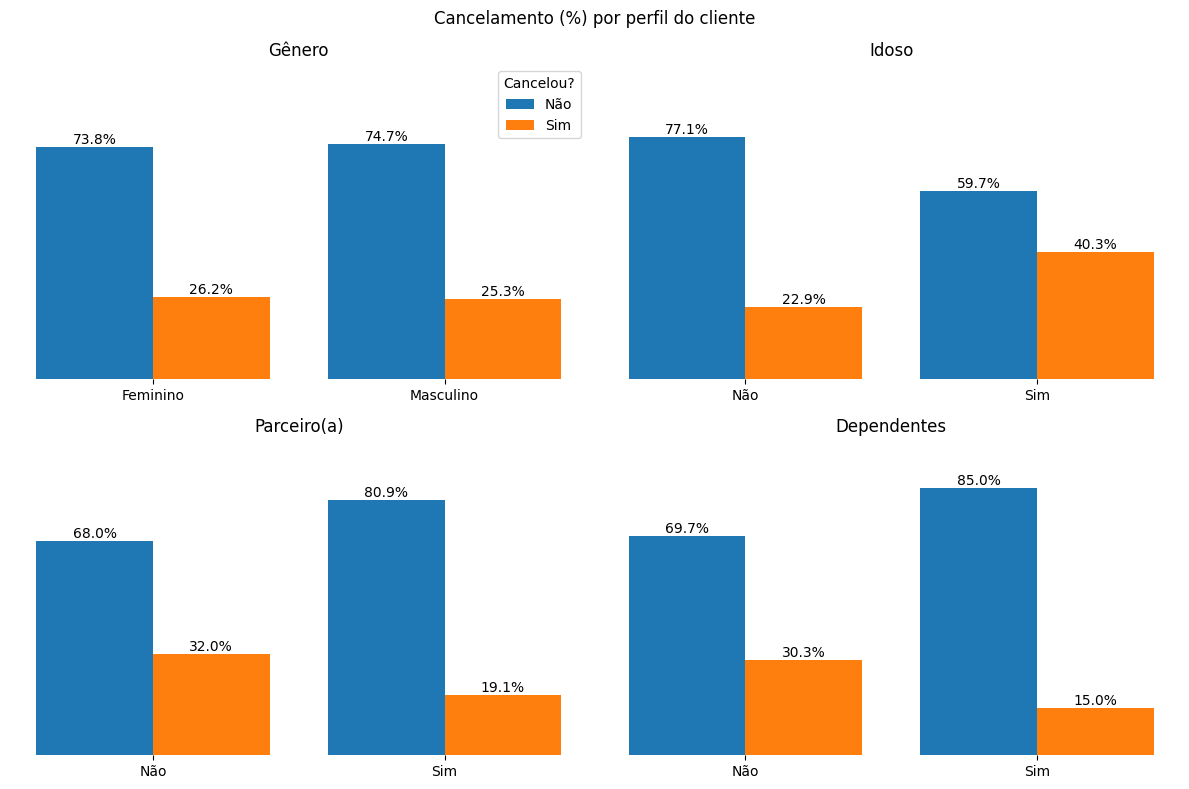

In [231]:

# --- Cancela (%) por perfil demográfico: gender, SeniorCitizen, Partner, Dependents ---
vars_demo = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
titles = ['Gênero', 'Idoso', 'Parceiro(a)', 'Dependentes']

label_maps = {
    'gender': {'Female': 'Feminino', 'Male': 'Masculino'},
    'SeniorCitizen': {0: 'Não', 1: 'Sim'},
    'Partner': {'Yes': 'Sim', 'No': 'Não'},
    'Dependents': {'Yes': 'Sim', 'No': 'Não'}
}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Cancelamento (%) por perfil do cliente')

for ax, var, title in zip(axs.flatten(), vars_demo, titles):
    ct = (
        df.groupby(var)['Churn']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index()
    )
    # map labels
    ct[var] = ct[var].map(label_maps[var])
    # order by category name for stable plotting
    categories = list(ct[var].drop_duplicates())
    churn_vals = ['No', 'Yes']

    # build bars manually with matplotlib
    x = np.arange(len(categories))
    width = 0.4

    for i, ch in enumerate(churn_vals):
        vals = []
        for c in categories:
            v = ct[(ct[var] == c) & (ct['Churn'] == ch)]['proportion']
            vals.append(float(v.values[0]) if len(v) else 0.0)
        ax.bar(x + (i-0.5)*width, vals, width, label=ch)

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=0)
    ax.set_ylim(0, 1)
    ax.yaxis.set_visible(False)
    # remove spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    # add percent labels
    for container in ax.containers:
        ax.bar_label(container, fmt="{:.1%}")

# única legenda
handles, labels = axs[0,0].get_legend_handles_labels()
axs[0,0].legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')

plt.show()


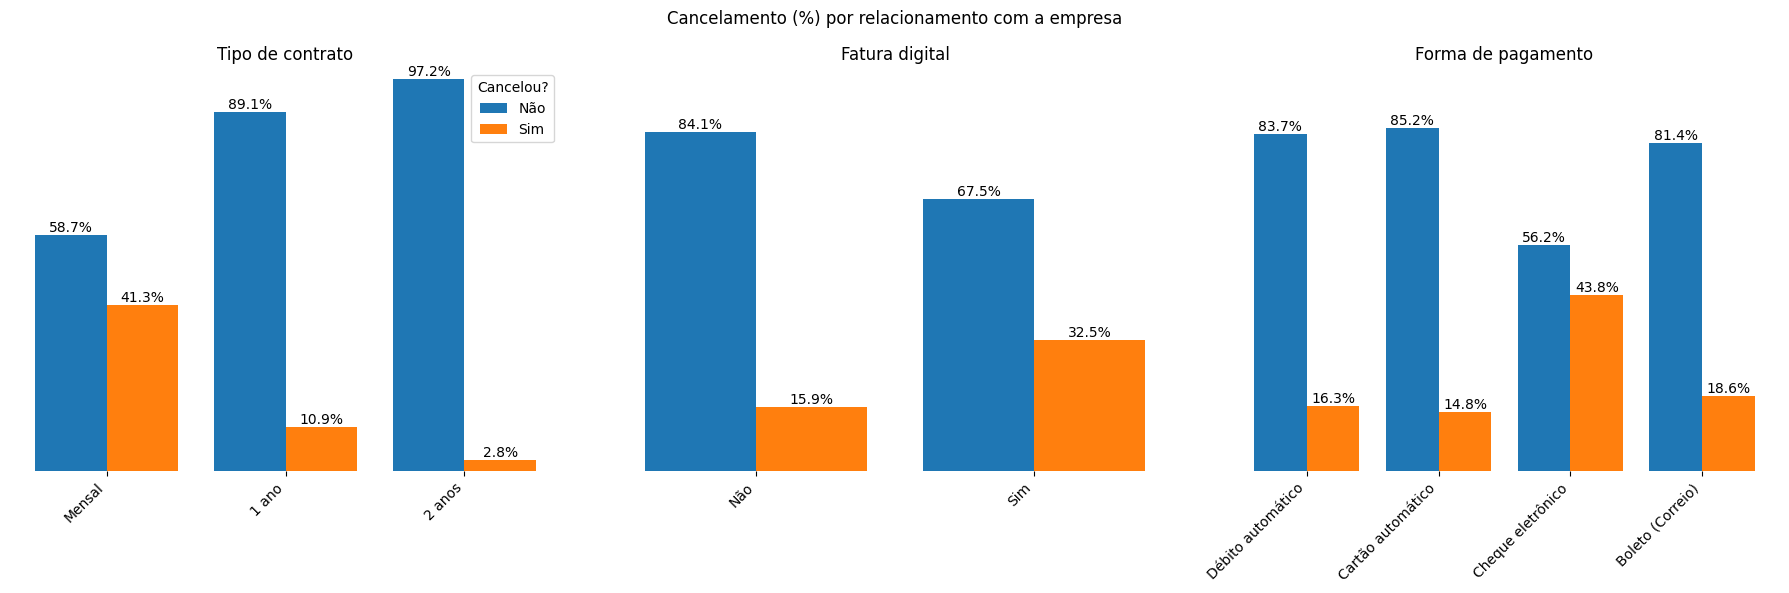

In [232]:

# --- Cancela (%) por relacionamento: Contract, PaperlessBilling, PaymentMethod ---
vars_rel = ['Contract', 'PaperlessBilling', 'PaymentMethod']
titles_rel = ['Tipo de contrato', 'Fatura digital', 'Forma de pagamento']

label_maps_rel = {
    'Contract': {
        'Month-to-month': 'Mensal',
        'One year': '1 ano',
        'Two year': '2 anos'
    },
    'PaperlessBilling': {'Yes': 'Sim', 'No': 'Não'},
    'PaymentMethod': {
        'Mailed check': 'Boleto (Correio)',
        'Electronic check': 'Cheque eletrônico',
        'Credit card (automatic)': 'Cartão automático',
        'Bank transfer (automatic)': 'Débito automático'
    }
}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Cancelamento (%) por relacionamento com a empresa')

for ax, var, title in zip(axs.flatten(), vars_rel, titles_rel):
    ct = (
        df.groupby(var)['Churn']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index()
    )
    ct[var] = ct[var].map(label_maps_rel[var])

    categories = list(ct[var].drop_duplicates())
    churn_vals = ['No', 'Yes']
    x = np.arange(len(categories))
    width = 0.4

    for i, ch in enumerate(churn_vals):
        vals = []
        for c in categories:
            v = ct[(ct[var] == c) & (ct['Churn'] == ch)]['proportion']
            vals.append(float(v.values[0]) if len(v) else 0.0)
        ax.bar(x + (i-0.5)*width, vals, width, label=ch)

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.yaxis.set_visible(False)
    for spine in ax.spines.values():
        spine.set_visible(False)
    for container in ax.containers:
        ax.bar_label(container, fmt="{:.1%}")

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')


plt.show()


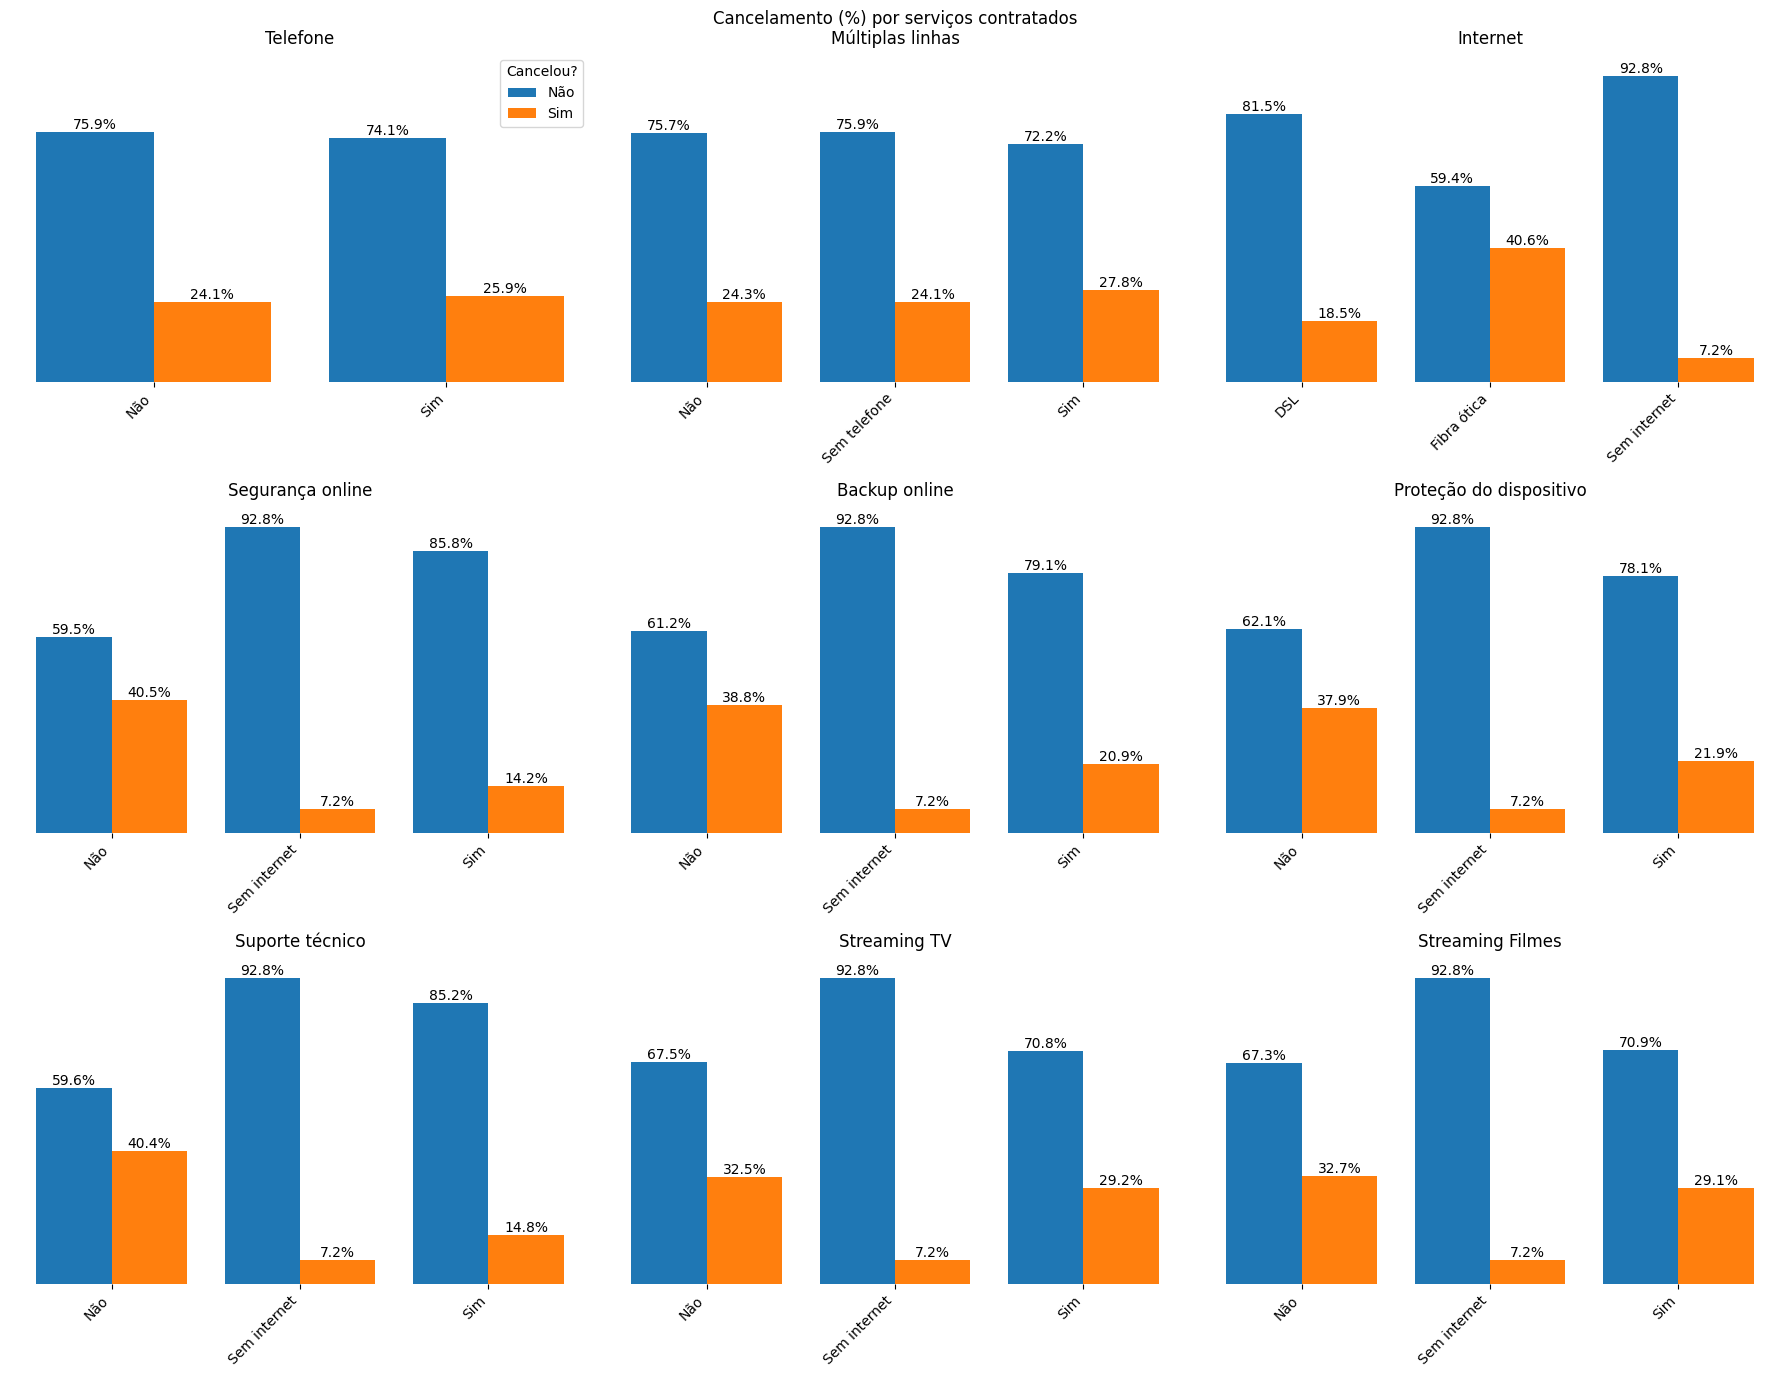

In [233]:

# --- Cancela (%) por serviços contratados (grade 3x3) ---
vars_serv = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

titles_serv = [
    'Telefone', 'Múltiplas linhas', 'Internet',
    'Segurança online', 'Backup online', 'Proteção do dispositivo',
    'Suporte técnico', 'Streaming TV', 'Streaming Filmes'
]

label_maps_serv = {
    'PhoneService': {'Yes': 'Sim', 'No': 'Não'},
    'MultipleLines': {'Yes': 'Sim', 'No': 'Não', 'No phone service': 'Sem telefone'},
    'InternetService': {'DSL': 'DSL', 'Fiber optic': 'Fibra ótica', 'No': 'Sem internet'},
    'OnlineSecurity': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'OnlineBackup': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'DeviceProtection': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'TechSupport': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'StreamingTV': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'},
    'StreamingMovies': {'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'}
}

fig, axs = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Cancelamento (%) por serviços contratados')

for ax, var, title in zip(axs.flatten(), vars_serv, titles_serv):
    ct = (
        df.groupby(var)['Churn']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index()
    )
    ct[var] = ct[var].map(label_maps_serv[var])

    categories = list(ct[var].drop_duplicates())
    churn_vals = ['No', 'Yes']
    x = np.arange(len(categories))
    width = 0.4

    for i, ch in enumerate(churn_vals):
        vals = []
        for c in categories:
            v = ct[(ct[var] == c) & (ct['Churn'] == ch)]['proportion']
            vals.append(float(v.values[0]) if len(v) else 0.0)
        ax.bar(x + (i-0.5)*width, vals, width, label=ch)

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.yaxis.set_visible(False)
    for spine in ax.spines.values():
        spine.set_visible(False)
    for container in ax.containers:
        ax.bar_label(container, fmt="{:.1%}")

# legenda única
handles, labels = axs[0,0].get_legend_handles_labels()
axs[0,0].legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')


plt.show()


/tmp/ipython-input-662034977.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col_bin)['Churn']
/tmp/ipython-input-662034977.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col_bin)['Churn']
/tmp/ipython-input-662034977.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col_bin)['Churn']


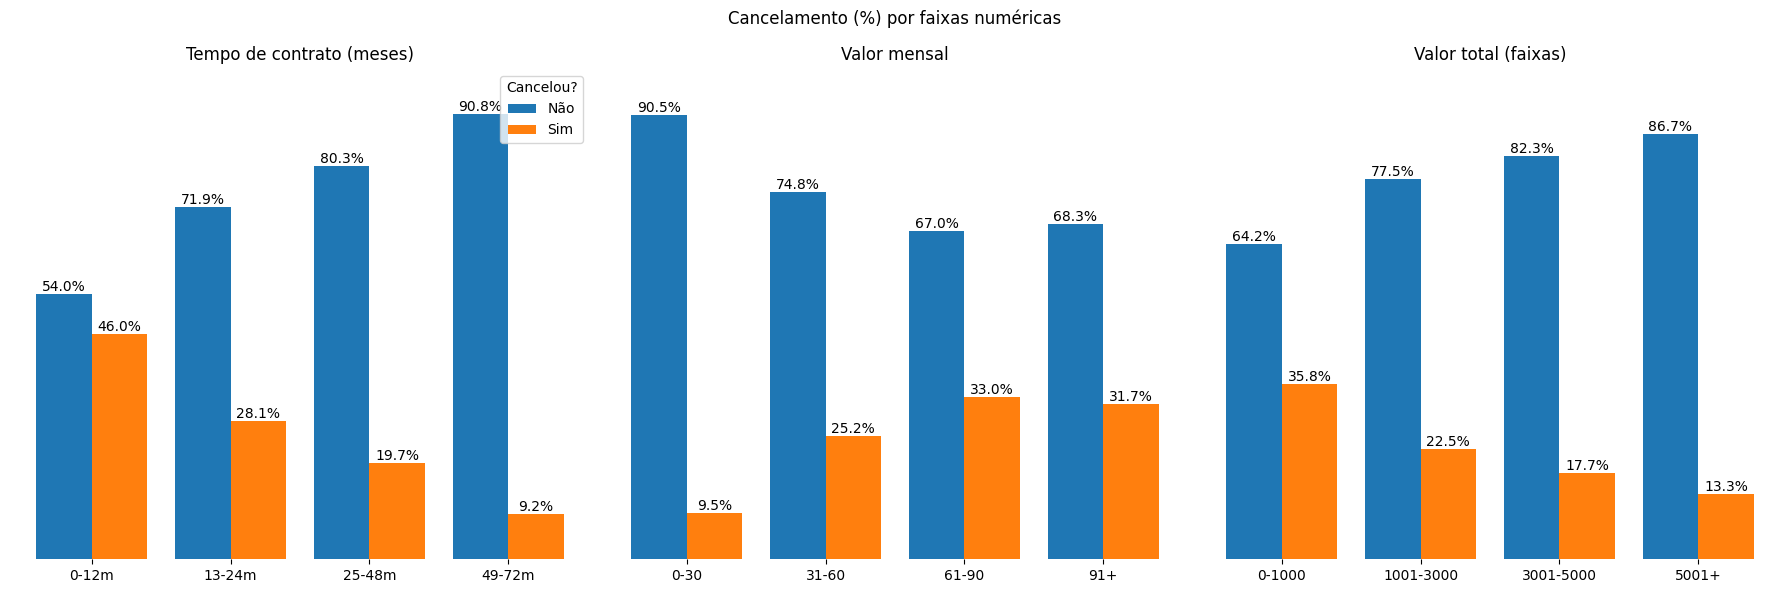

In [234]:

# --- Cancela (%) por faixas numéricas ---
# Tenure bins
tenure_bins = [0, 12, 24, 48, 72]
tenure_labels = ['0-12m', '13-24m', '25-48m', '49-72m']
df['tenure_bin'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, include_lowest=True)

# Charges.Monthly bins
monthly_bins = [0, 30, 60, 90, df['Charges.Monthly'].max()]
monthly_labels = ['0-30', '31-60', '61-90', '91+']
df['Charges.Monthly_bin'] = pd.cut(df['Charges.Monthly'], bins=monthly_bins, labels=monthly_labels, include_lowest=True)

# Charges.Total bins
total_bins = [0, 1000, 3000, 5000, df['Charges.Total'].max()]
total_labels = ['0-1000', '1001-3000', '3001-5000', '5001+']
df['Charges.Total_bin'] = pd.cut(df['Charges.Total'], bins=total_bins, labels=total_labels, include_lowest=True)

def plot_churn_bins(col_bin, ax, title):
    ct = (
        df.groupby(col_bin)['Churn']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index()
    )
    categories = list(ct[col_bin].astype(str).drop_duplicates())
    churn_vals = ['No', 'Yes']
    x = np.arange(len(categories))
    width = 0.4

    for i, ch in enumerate(churn_vals):
        vals = []
        for c in categories:
            v = ct[(ct[col_bin].astype(str) == c) & (ct['Churn'] == ch)]['proportion']
            vals.append(float(v.values[0]) if len(v) else 0.0)
        ax.bar(x + (i-0.5)*width, vals, width, label=ch)

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=0)
    ax.set_ylim(0, 1)
    ax.yaxis.set_visible(False)
    for spine in ax.spines.values():
        spine.set_visible(False)
    for container in ax.containers:
        ax.bar_label(container, fmt="{:.1%}")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Cancelamento (%) por faixas numéricas')

plot_churn_bins('tenure_bin', axs[0], 'Tempo de contrato (meses)')
plot_churn_bins('Charges.Monthly_bin', axs[1], 'Valor mensal')
plot_churn_bins('Charges.Total_bin', axs[2], 'Valor total (faixas)')

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, ['Não', 'Sim'], title='Cancelou?', loc='upper right')


plt.show()


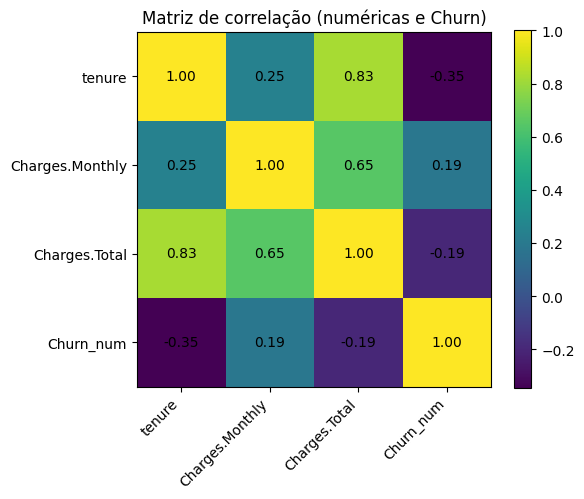

In [235]:

# --- Correlação entre numéricas e Churn (Churn -> 0/1) ---
df_corr = df.copy()
df_corr['Churn_num'] = df_corr['Churn'].map({'No':0, 'Yes':1})

num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn_num']
corr = df_corr[num_cols].corr()

fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title('Matriz de correlação (numéricas e Churn)')
ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha='right')
ax.set_yticklabels(num_cols)

# anotações
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center')

fig.colorbar(cax, ax=ax)
plt.show()



## Conclusões e Insights
Principais achados esperados (confirmar nos gráficos gerados):
- **Contrato "Mensal"** e **Fatura digital ativa** tendem a apresentar maior percentual de `Churn`.
- **Forma de pagamento "Cheque eletrônico"** costuma concentrar mais cancelamentos; **pagamentos automáticos** menos.
- Em serviços, ausência de **`OnlineSecurity`** e **`TechSupport`** geralmente eleva o `Churn`.
- **`tenure` baixo** (clientes recém-adquiridos) mostra maior propensão ao cancelamento.
- **`Charges.Monthly`** mais altas aparecem associadas a maior `Churn`.
- A correlação indica relação **negativa** entre `tenure` e `Churn`, e **positiva** entre `Charges.Monthly` e `Churn_num`.



## Recomendações
1. **Retenção no 1º ano**: rotinas de *onboarding* e ofertas de valor para clientes com `tenure` baixo (0–12m).
2. **Bundles de segurança/suporte**: descontos ou *trials* de `OnlineSecurity` e `TechSupport` para clientes de alto risco (contrato mensal, fibra, cobrança alta).
3. **Revisão de preços**: planos com `Charges.Monthly` elevadas → oferecer *downgrade* assistido ou *bundle* com benefício associado.
4. **Pagamento automático**: incentivar `Cartão automático`/`Débito automático` com benefício financeiro ou bônus de fidelidade.
5. **Planos de maior prazo**: *upsell* de `Mensal` para `1 ano` com garantias (ex.: multa reduzida, bônus de dados, *cashback*).
6. **Monitoramento contínuo**: acompanhar **taxas de churn** por coortes de entrada e por **segmentos de serviço**; disparar alertas quando cruzarem *thresholds* (ex.: 30%/40%).
7. **Próximos passos analíticos**: ajustar um **modelo interpretable** (Regressão Logística/XGBoost + SHAP) para quantificar *drivers* individuais de risco e priorizar ações personalizadas.
